#Analysing Happiness: Understanding Determinants Across Global Contexts

Our objective is to identify which factor is the most significant in contributing to the happiness of a country.

##Methodology

###Data Collection

We utilised data from the [World Happiness Report 2023](https://worldhappiness.report/ed/2023/), which includes various metrics related to happiness of a country.

In [ ]:
# Import required libraries
import pandas as pd

In [ ]:
df = pd.read_excel('https://happiness-report.s3.amazonaws.com/2023/DataForFigure2.1WHR2023.xls', usecols=[0, 1, 5, 6, 7, 8, 9, 10])

# Rename columns for clarity
df.rename(columns={'Ladder score': 'Happiness score'}, inplace=True)
df.rename(columns={'Freedom to make life choices': 'Freedom'}, inplace=True)
df.rename(columns={'Perceptions of corruption': 'Low corruption'}, inplace=True)

# Display the first few rows of the dataframe
df.head()

,Country name,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Low corruption
0,Finland,7.8042,10.792010,0.968770,71.149994,0.961408,-0.018824,0.181745
1,Denmark,7.5864,10.962164,0.954112,71.250145,0.933533,0.134242,0.195814
2,Iceland,7.5296,10.895531,0.982533,72.050018,0.936349,0.210987,0.667848
3,Israel,7.4729,10.638705,0.943344,72.697205,0.808866,-0.023080,0.708094
4,Netherlands,7.4030,10.942279,0.930499,71.550018,0.886875,0.212686,0.378929


In [ ]:
# Some information on our data set
df.info()
# There seems to be a null value, which we will deal with later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country name             137 non-null    object 
 1   Happiness score          137 non-null    float64
 2   Logged GDP per capita    137 non-null    float64
 3   Social support           137 non-null    float64
 4   Healthy life expectancy  136 non-null    float64
 5   Freedom                  137 non-null    float64
 6   Generosity               137 non-null    float64
 7   Low corruption           137 non-null    float64
dtypes: float64(7), object(1)
memory usage: 8.7+ KB


There are 6 factors that are taken into consideration to produce the happiness score:
1. GDP per capita,
2. social support,
3. healthy life expectancy,
4. freedom,
5. generosity,
6. corruption.

###Data Cleaning and Preparation

In [ ]:
# Check for missing values in the dataset
df.isnull().sum()

Country name               0
Happiness score            0
Logged GDP per capita      0
Social support             0
Healthy life expectancy    1
Freedom                    0
Generosity                 0
Low corruption             0
dtype: int64

In [ ]:
# There is a missing value for the healthy life expectancy,
# so we fill in the value using the mean value of the column.
df['Healthy life expectancy'].fillna(df['Healthy life expectancy'].mean(), inplace= True)

In [ ]:
# Normalise values so that they fall between 0 and 1.
for column in df.columns:
  if column != 'Country name':
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

df.head()

,Country name,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Low corruption
0,Finland,1.000000,0.858486,0.978535,0.761946,1.000000,0.299686,0.045509
1,Denmark,0.963365,0.886229,0.955675,0.765836,0.951920,0.494511,0.063478
2,Iceland,0.953811,0.875364,1.000000,0.796899,0.956778,0.592192,0.666348
3,Israel,0.944274,0.833490,0.938881,0.822033,0.736890,0.294269,0.717749
4,Netherlands,0.932517,0.882986,0.918848,0.777481,0.871443,0.594355,0.297348


In [ ]:
# We want higher countries to have higher values on 'Low corruption', and vice versa.
def new_score(x):
    return 1 - x

df['Low corruption'] = df['Low corruption'].apply(new_score)

df.head()

,Country name,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Low corruption
0,Finland,1.000000,0.858486,0.978535,0.761946,1.000000,0.299686,0.954491
1,Denmark,0.963365,0.886229,0.955675,0.765836,0.951920,0.494511,0.936522
2,Iceland,0.953811,0.875364,1.000000,0.796899,0.956778,0.592192,0.333652
3,Israel,0.944274,0.833490,0.938881,0.822033,0.736890,0.294269,0.282251
4,Netherlands,0.932517,0.882986,0.918848,0.777481,0.871443,0.594355,0.702652


###Regression Analysis

We performed regression analysis to model the relationship between each factor and the happiness scores and thus quantify the impact of each factor on happiness.


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Separate the predictor (x) and the target variable (y)
x = df[['Logged GDP per capita']]  # Replace with predictor variable
y = df['Happiness score']  # Replace with target variable

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error: ', mse)
print('Regression coefficient: ', model.coef_[0])

Mean Squared Error:  0.01106893271942806
Regression coefficient:  0.7425713510991162


The **Mean Squared Error (MSE)** measures how close a regression line is to a set of data points. MSE is calculated by taking the squared mean of errors from data as it relates to a function.

A small MSE obtained above implies that our linear regression model is quite accurate.

The **regression coefficient** indicates the strength of the relationship between the independent and dependent variables.

We can now repeat the above process for the other factors.

In [ ]:
coefficients = [] # this list stores coefficients of linear regressions of each factor

# Define a function that creates a linear regression model for happiness score against each factor, and
# outputs coefficients
def linear_reg(x, y):
  # Split the data into training and testing sets (80% train, 20% test)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  # Create a linear regression model
  model = LinearRegression()

  # Fit the model to the training data
  model.fit(x_train, y_train)

  # Make predictions on the test data
  y_pred = model.predict(x_test)

  coefficients.append(model.coef_[0])

columns = df.columns[2:]
for column in columns:
  x = df[[column]]
  y = df['Happiness score']

  linear_reg(x, y)

##Results

In [ ]:
# Create a dataframe containing names of factors and regression coefficients
coefficients = pd.DataFrame({'Factor': columns, 'Coefficient': coefficients})

# sort coefficients in descending order
coefficients = coefficients.sort_values(by = 'Coefficient', ascending = False)

print(coefficients)

                    Factor  Coefficient
1           Social support     0.806803
0    Logged GDP per capita     0.742571
3                  Freedom     0.681973
2  Healthy life expectancy     0.646946
5           Low corruption     0.379367
4               Generosity     0.034085


To better visualise the relationship between each factor and the happiness score, we can plot a graph of happiness score against each factor.

In [ ]:
import seaborn as sns

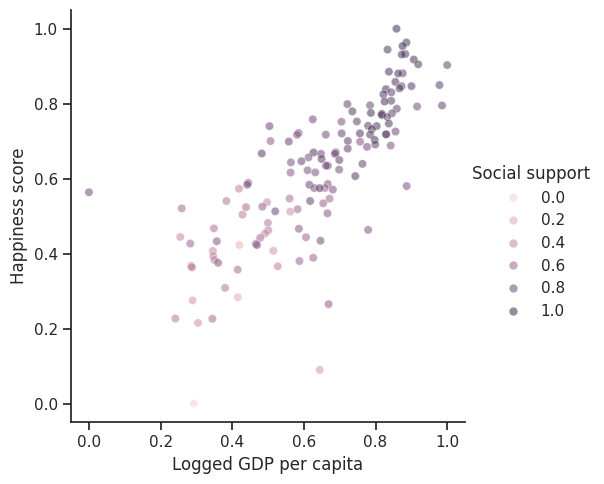

In [ ]:
# Relationship plot between logged GDP per capita & social support & happiness score
sns.set_theme(style = 'ticks')

sns.relplot(
    data = df,
    x = 'Logged GDP per capita',
    y = 'Happiness score',
    hue = 'Social support',
    alpha = 0.5
)

# todo: subplot

##Interpretation

We plot a bar graph of coefficients against factors.

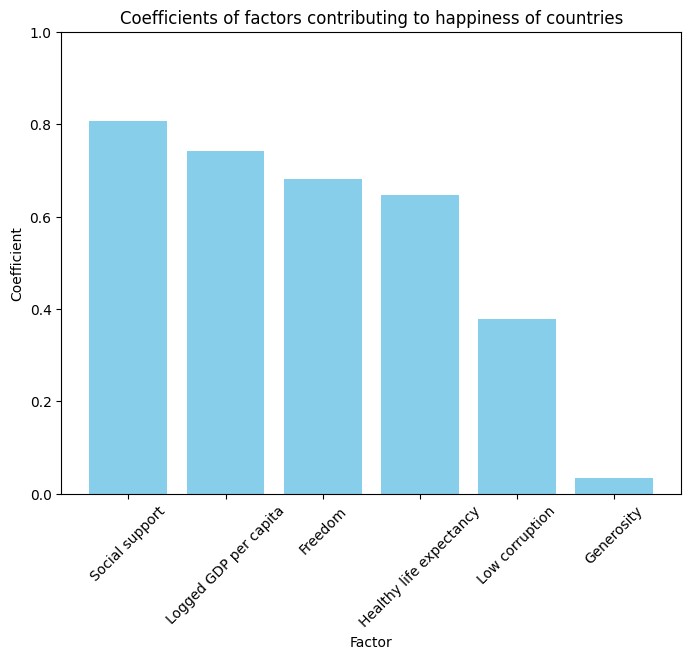

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(coefficients['Factor'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Factor')
plt.ylabel('Coefficient')
plt.title('Coefficients of factors contributing to happiness of countries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1) # Set the y-axis limits from 0 to 1
plt.show()

To identify which factor is the most significant in contributing to the happiness of a country, we can look at the magnitude of the regression coefficients obtained from the linear regression model. The factor with the largest coefficient is considered the most significant predictor of happiness in the model.

From these coefficients, we can see that "Social Support" has the highest coefficient (0.806803), followed by "Logged GDP per Capita" (0.742571), "Freedom" (0.681973), "Healthy Life Expectancy" (0.646946), "Low Corruption" (0.379367), and "Generosity" (0.034085).

Therefore, based on these coefficients, we can conclude that "Social Support" is the most significant factor contributing to the happiness of a country.

##Conclusion

Based on the coefficients obtained, the conclusion drawn is that "Social Support" appears to be the most significant factor contributing to the happiness of a country, followed by "Logged GDP per Capita," "Freedom," "Healthy Life Expectancy," "Low Corruption," and "Generosity".

However, it's important to exercise caution in interpreting these results. While the coefficients provide insight into the strength of association between each factor and happiness, they do not imply causation. Additionally, the accuracy of the results depends on the quality of the data and assumptions of linearity in our regression model.

To improve our analysis, sensitivity analyses, inclusion of additional factors and cross-checking with other data sources can be employed to enhance the accuracy and reliability of our findings.